<a href="https://colab.research.google.com/github/Frynnn-69/mini-research-bdc2025/blob/main/src/03_modeling/03_audio_model_augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# v3 (RAVDESS)

#Setup

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

repo_path = '/content/drive/My Drive/mini-research-bdc2025/'
os.chdir(repo_path)
!git pull

# --- CHANGE PATH ---
notebook_folder = '/content/drive/MyDrive/mini-research-bdc2025/src/03_modeling'

working_dir = os.path.join(repo_path, notebook_folder)
os.chdir(working_dir)

!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 4), reused 7 (delta 3), pack-reused 0 (from 0)
Unpacking objects: 100% (8/8), 956 bytes | 0 bytes/s, done.
From https://github.com/frynnn-69/mini-research-bdc2025
   4e20ab0..d9e5bb3  main       -> origin/main
Updating f68d558..d9e5bb3
error: Your local changes to the following files would be overwritten by merge:
	src/02_data_processing/02_data_pipeline.ipynb
Please commit your changes or stash them before you merge.
error: The following untracked working tree files would be overwritten by merge:
	src/02_data_processing/datatrain_augmented.csv
Please move or remove them before you merge.
Aborting
/content/drive/MyDrive/mini-research-bdc2025/src/03_modeling


In [2]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

csv_path = '/content/drive/My Drive/mini-research-bdc2025/src/02_data_processing/datatrain_augmented.csv'
df_model_data = pd.read_csv(csv_path)
print(f"{len(df_model_data)} total rows.")

data_processing_dir = '/content/drive/My Drive/mini-research-bdc2025/src/02_data_processing'
def fix_path(path):
    if 'ravdess_speech_audio' in path:
        return os.path.join(data_processing_dir, path)
    return path
df_model_data['audio_path'] = df_model_data['audio_path'].apply(fix_path)

df_model_data['audio_exists'] = df_model_data['audio_path'].apply(os.path.exists)
original_rows = len(df_model_data)
df_model_data = df_model_data[df_model_data['audio_exists']].copy()
validated_rows = len(df_model_data)
df_model_data.drop(columns=['audio_exists'], inplace=True)

#validasi
if original_rows != validated_rows:
    print(f"{original_rows - validated_rows} audio files ❌.")

display(df_model_data.head())

1427 total rows.
3 audio files ❌.


,emotion,audio_path
0,Surprise,/content/drive/My Drive/BDC_DATASET/audio/trai...
1,Surprise,/content/drive/My Drive/BDC_DATASET/audio/trai...
2,Surprise,/content/drive/My Drive/BDC_DATASET/audio/trai...
3,Surprise,/content/drive/My Drive/BDC_DATASET/audio/trai...
4,Proud,/content/drive/My Drive/BDC_DATASET/audio/trai...


In [3]:
if 'df_model_data' in locals():
    train_df, val_df = train_test_split(
        df_model_data,
        test_size=0.2,
        random_state=42,
        stratify=df_model_data['emotion']
    )

    print(f"Train: {len(train_df)}")
    print(f"Validation: {len(val_df)}")

    print("\nProportion of emotions in training data:")
    print(train_df['emotion'].value_counts(normalize=True))
    print("\nProportion of emotions in validation data:")
    print(val_df['emotion'].value_counts(normalize=True))
else:
    print("ERROR: Dataframe 'df_model_data' not found.")

Train: 1139
Validation: 285

Proportion of emotions in training data:
emotion
Surprise    0.221247
Anger       0.159789
Fear        0.145742
Sadness     0.145742
Trust       0.115013
Proud       0.104478
Neutral     0.071993
Joy         0.035996
Name: proportion, dtype: float64

Proportion of emotions in validation data:
emotion
Surprise    0.221053
Anger       0.161404
Sadness     0.147368
Fear        0.143860
Trust       0.115789
Proud       0.105263
Neutral     0.070175
Joy         0.035088
Name: proportion, dtype: float64


In [4]:
!pip install -q datasets torchcodec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.2 MB/s eta 0:00:00


In [5]:
from datasets import Dataset, Audio

if 'train_df' in locals() and 'val_df' in locals():
    data_processing_dir = '/content/drive/My Drive/mini-research-bdc2025/src/02_data_processing'

    def fix_ravdess_path(path):
        if 'ravdess_speech_audio' in path:
            return os.path.join(data_processing_dir, path)
        return path

    train_df['audio_path'] = train_df['audio_path'].apply(fix_ravdess_path)
    val_df['audio_path'] = val_df['audio_path'].apply(fix_ravdess_path)

    id2label = {
        0: "Proud", 1: "Trust", 2: "Joy", 3: "Surprise",
        4: "Neutral", 5: "Sadness", 6: "Fear", 7: "Anger"
    }
    label2id = {label: id for id, label in id2label.items()}

    print("label2id:", label2id)
    print("id2label:", id2label)

    train_dataset = Dataset.from_pandas(train_df)
    val_dataset = Dataset.from_pandas(val_df)

    train_dataset = train_dataset.cast_column("audio_path", Audio(sampling_rate=16000))
    val_dataset = val_dataset.cast_column("audio_path", Audio(sampling_rate=16000))

    print("Training Dataset:")
    print(train_dataset)
    print("\nValidation Dataset:")
    print(val_dataset)

else:
    print("ERROR: 'train_df' or 'val_df' not found.")

label2id: {'Proud': 0, 'Trust': 1, 'Joy': 2, 'Surprise': 3, 'Neutral': 4, 'Sadness': 5, 'Fear': 6, 'Anger': 7}
id2label: {0: 'Proud', 1: 'Trust', 2: 'Joy', 3: 'Surprise', 4: 'Neutral', 5: 'Sadness', 6: 'Fear', 7: 'Anger'}
Training Dataset:
Dataset({
    features: ['emotion', 'audio_path', '__index_level_0__'],
    num_rows: 1139
})

Validation Dataset:
Dataset({
    features: ['emotion', 'audio_path', '__index_level_0__'],
    num_rows: 285
})


#Modeling & Training

In [6]:
!pip install -q transformers accelerate

In [7]:
from transformers import AutoFeatureExtractor, AutoModelForAudioClassification

model_checkpoint = "facebook/wav2vec2-base"
num_labels = len(label2id)

if 'label2id' in locals():
    # 1. Unduh "pisau dapur" (Feature Extractor)
    feature_extractor = AutoFeatureExtractor.from_pretrained(model_checkpoint)
    print(feature_extractor)

    # 2. Unduh "koki" (Model)
    model = AutoModelForAudioClassification.from_pretrained(
        model_checkpoint,
        num_labels=num_labels,
        label2id=label2id,
        id2label=id2label,
    )

    #print(model)

else:
    print("ERROR: Variabel 'label2id' not found.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/configuration_utils.py:335: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "return_attention_mask": false,
  "sampling_rate": 16000
}



pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
if 'feature_extractor' in locals():
    def preprocess_function(examples):
        audio_arrays = [x["array"] for x in examples["audio_path"]]
        inputs = feature_extractor(
            audio_arrays,
            sampling_rate=feature_extractor.sampling_rate,
            max_length=16000 * 5,
            truncation=True,
            padding=True
        )

        inputs["labels"] = [label2id[label] for label in examples["emotion"]]
        return inputs

    encoded_train_dataset = train_dataset.map(preprocess_function, remove_columns=["emotion", "audio_path", "__index_level_0__"], batched=True)

    encoded_val_dataset = val_dataset.map(preprocess_function, remove_columns=["emotion", "audio_path", "__index_level_0__"], batched=True)

    print(encoded_train_dataset[0])

else:
    print("ERROR: Variabel 'feature_extractor' not found.")

Map:   0%|          | 0/1139 [00:00<?, ? examples/s]

Map:   0%|          | 0/285 [00:00<?, ? examples/s]

{'input_values': [0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.0018926738994196057, 0.001892764470539987, 0.0018923718016594648, 0.0018933003302663565, 0.001891711144708097, 0.0018937152344733477, 0.001892333384603262, 0.001890671905130148, 0.001899956725537777, 0.0018753312760964036, 0.001927497098222375, 0.001829324522987008, 0.002001003362238407, 0.0017140910495072603, 0.002185381483286619, 0.001392712933011353, 0.0028918276075273752, -0.0024970269296318293, -0.0004486645048018545, 0.0028771143406629562, 0.0012412449577823281, 0.0024136253632605076, 0.0014080145629122853, 0.0024195800069719553, 0.0012090703239664435, 0.003040188690647483, -0

In [9]:
!pip install -q evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


In [10]:
import numpy as np
import evaluate

accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    predictions = np.argmax(predictions, axis=1)

    acc_score = accuracy.compute(predictions=predictions, references=labels)

    f1_score = f1.compute(predictions=predictions, references=labels, average="macro")

    return {
        "accuracy": acc_score["accuracy"],
        "f1_macro": f1_score["f1"],
    }

In [11]:
from transformers import TrainingArguments, Trainer

repository_id = "wav2vec2-base-bdc2025-finetuned-audio-emotion"

training_args = TrainingArguments(
    output_dir=repository_id,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    learning_rate=3e-5,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    push_to_hub=False,

    eval_strategy="steps",
    eval_steps=76,
    save_strategy="steps",
    save_steps=76,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train_dataset,
    eval_dataset=encoded_val_dataset,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

/tmp/ipython-input-1986575526.py:24: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()
#trainer.train(resume_from_checkpoint=True)

Step,Training Loss,Validation Loss,Accuracy,F1 Macro
76,1.933700,1.846291,0.389474,0.186172
152,1.514900,1.460676,0.487719,0.279328
228,1.372400,1.299072,0.536842,0.331782
304,1.242800,1.201069,0.564912,0.351272
380,1.243800,1.165876,0.571930,0.357969
456,1.151900,1.196664,0.561404,0.405384
532,1.076600,1.104930,0.614035,0.464905
608,1.016100,1.129199,0.624561,0.483682
684,1.044000,1.128694,0.603509,0.465438
760,1.024600,1.040340,0.638596,0.499744


#Testing


In [12]:
test_csv_path = '/content/drive/MyDrive/mini-research-bdc2025/src/datatest.csv'
base_storage_path = '/content/drive/My Drive/BDC_DATASET/'
video_test_path = os.path.join(base_storage_path, 'videos', 'test')
audio_test_path = os.path.join(base_storage_path, 'audio', 'test')

os.makedirs(video_test_path, exist_ok=True)
os.makedirs(audio_test_path, exist_ok=True)

df_test = pd.read_csv(test_csv_path)
print(f"\n{len(df_test)} test video found.")


200 test video found.


In [13]:
!pip install -q yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.6 MB/s eta 0:00:00


In [14]:

import subprocess
import time
import random

if 'df_test' in locals():
    for index, row in df_test.iterrows():
        video_id = row['id']
        video_url = row['video']

        output_audio_path = os.path.join(audio_test_path, f"audio_{video_id}.wav")

        if os.path.exists(output_audio_path):
            print(f"Audio ID {video_id}: .")
            continue

        video_output_template = os.path.join(video_test_path, f"video_{video_id}.%(ext)s")
        cookies_file_path = '/cookies.txt'

        command_dl = f"yt-dlp -q --cookies '{cookies_file_path}' -f 'bv*[ext=mp4]+ba[ext=m4a]/b[ext=mp4] / bv*+ba/b' -o '{video_output_template}' '{video_url}'"

        try:
            # Unduh Vid
            subprocess.run(command_dl, shell=True, check=True, capture_output=True, text=True)

            # Ekstrak Aud
            downloaded_video_file = None
            for fname in os.listdir(video_test_path):
                if fname.startswith(f"video_{video_id}."):
                    downloaded_video_file = os.path.join(video_test_path, fname)
                    break

            if downloaded_video_file:
                command_ffmpeg = f"ffmpeg -i '{downloaded_video_file}' -vn -acodec pcm_s16le -ar 16000 -ac 1 '{output_audio_path}'"
                subprocess.run(command_ffmpeg, shell=True, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
                print(f"Video ID {video_id}: Successfully ")
                os.remove(downloaded_video_file)
            else:
                print(f"Video ID {video_id}: Failed")

        except subprocess.CalledProcessError as e:
            error_lines = e.stderr.strip().split('\n')
            print(f"Video ID {video_id}:{error_lines[-1]}")

        time.sleep(random.uniform(1, 3))
else:
    print("Error")

Audio ID 1: .
Audio ID 2: .
Audio ID 3: .
Audio ID 4: .
Audio ID 5: .
Audio ID 6: .
Audio ID 7: .
Audio ID 8: .
Audio ID 9: .
Audio ID 10: .
Audio ID 11: .
Audio ID 12: .
Audio ID 13: .
Audio ID 14: .
Audio ID 15: .
Audio ID 16: .
Audio ID 17: .
Audio ID 18: .
Audio ID 19: .
Audio ID 20: .
Audio ID 21: .
Audio ID 22: .
Audio ID 23: .
Audio ID 24: .
Audio ID 25: .
Audio ID 26: .
Audio ID 27: .
Audio ID 28: .
Audio ID 29: .
Audio ID 30: .
Video ID 31: Successfully 
Video ID 32:ERROR: [Instagram] DMXTZgrPSvm: Requested content is not available, rate-limit reached or login required. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies
Video ID 33:ERROR: [Instagram] DMzRtsgS7CM: Requested content is not available, rate-limit reached or login required. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i

In [15]:
from datasets import Dataset, Audio
import numpy as np

if os.path.exists(audio_test_path) and len(os.listdir(audio_test_path)) > 0:
    print(f"{len(os.listdir(audio_test_path))} audio test ready.")

    test_audio_files = os.listdir(audio_test_path)
    test_ids = [int(f.replace('audio_', '').replace('.wav', '')) for f in test_audio_files]
    df_test_audio = pd.DataFrame({
        'id': test_ids,
        'audio_path': [os.path.join(audio_test_path, f) for f in test_audio_files]
    })

    test_dataset = Dataset.from_pandas(df_test_audio)
    test_dataset = test_dataset.cast_column("audio_path", Audio(sampling_rate=16000))

    # no-labeling
    def preprocess_test_function(examples):
        audio_arrays = [x["array"] for x in examples["audio_path"]]
        inputs = feature_extractor(
            audio_arrays,
            sampling_rate=feature_extractor.sampling_rate,
            max_length=16000 * 5,
            truncation=True,
            padding=True
        )
        return inputs

    encoded_test_dataset = test_dataset.map(preprocess_test_function, remove_columns=["audio_path"], batched=True)

    print("\Successfully")

else:
    print("Failed")

89 audio test ready.


<>:31: SyntaxWarning: invalid escape sequence '\S'
<>:31: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-1469984039.py:31: SyntaxWarning: invalid escape sequence '\S'
  print("\Successfully")


Map:   0%|          | 0/89 [00:00<?, ? examples/s]

\Successfully


In [16]:
if 'encoded_test_dataset' in locals():
    test_predictions = trainer.predict(encoded_test_dataset)
    predicted_label_ids = np.argmax(test_predictions.predictions, axis=1)
    df_test_audio['predicted_id'] = predicted_label_ids
    display(df_test_audio.head())
else:
    print("ERROR: Dataset 'encoded_test_dataset' not found.")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


,id,audio_path,predicted_id
0,1,/content/drive/My Drive/BDC_DATASET/audio/test...,5
1,2,/content/drive/My Drive/BDC_DATASET/audio/test...,5
2,3,/content/drive/My Drive/BDC_DATASET/audio/test...,5
3,4,/content/drive/My Drive/BDC_DATASET/audio/test...,5
4,5,/content/drive/My Drive/BDC_DATASET/audio/test...,5


In [18]:
import pandas as pd

if 'df_test_audio' in locals():
    official_label_map = {
        'Proud': 0, 'Trust': 1, 'Joy': 2, 'Surprise': 3,
        'Neutral': 4, 'Sadness': 5, 'Fear': 6, 'Anger': 7
    }

    df_test_audio['predicted_emotion'] = df_test_audio['predicted_id'].apply(lambda x: id2label[x])
    df_test_audio['predicted'] = df_test_audio['predicted_emotion'].apply(lambda x: official_label_map[x])

    submission_template_path = '/submission.csv'
    df_submission = pd.read_csv(submission_template_path)
    df_submission.columns = df_submission.columns.str.strip()

    df_submission = df_submission.drop(columns=['predicted'])
    final_submission_df = pd.merge(df_submission, df_test_audio[['id', 'predicted']], on='id', how='left')

    # --- PERBAIKAN: Aktifkan baris di bawah ini ---
    # Ini akan mengisi HANYA baris yang kosong dengan prediksi kelas mayoritas
    most_frequent_class_id = 3 # ID untuk 'Surprise'
    final_submission_df['predicted'] = final_submission_df['predicted'].fillna(most_frequent_class_id)

    # Sekarang konversi ke integer akan berhasil
    final_submission_df['predicted'] = final_submission_df['predicted'].astype(int)

    submission_filename = 'submission_v3.csv'
    final_submission_df.to_csv(submission_filename, index=False)

    display(final_submission_df.head())

else:
    print("❌ ERROR: Dataframe 'df_test_audio' not found.")

,id,predicted
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5


# Model Evaluation

## Error Analysis
*   Classification Report
*   Confusion Matrix

In [19]:
validation_results = trainer.predict(encoded_val_dataset)

y_true = validation_results.label_ids
y_pred = validation_results.predictions.argmax(axis=1)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [20]:
from sklearn.metrics import classification_report

target_names = [id2label[i] for i in range(num_labels)]

print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Proud       0.00      0.00      0.00        30
       Trust       0.00      0.00      0.00        33
         Joy       0.00      0.00      0.00        10
    Surprise       0.00      0.00      0.00        63
     Neutral       0.00      0.00      0.00        20
     Sadness       0.12      0.81      0.22        42
        Fear       0.00      0.00      0.00        41
       Anger       0.00      0.00      0.00        46

    accuracy                           0.12       285
   macro avg       0.02      0.10      0.03       285
weighted avg       0.02      0.12      0.03       285



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


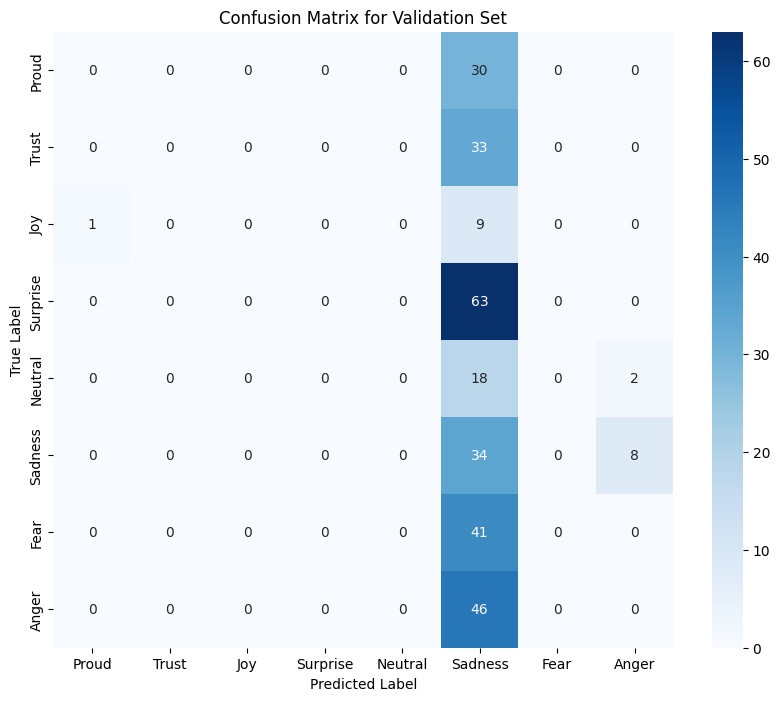

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Validation Set')
plt.show()